<IPython.core.display.Javascript object>


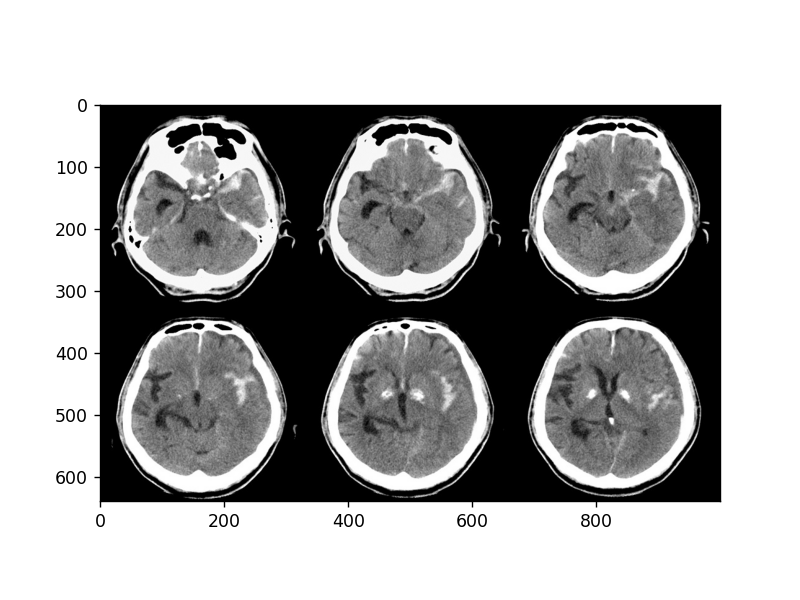

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib notebook
ddir='C:/Users/vijay/Desktop/website/CT.jpg'
ct=plt.imread(ddir)
plt.imshow(ct)


<IPython.core.display.Javascript object>


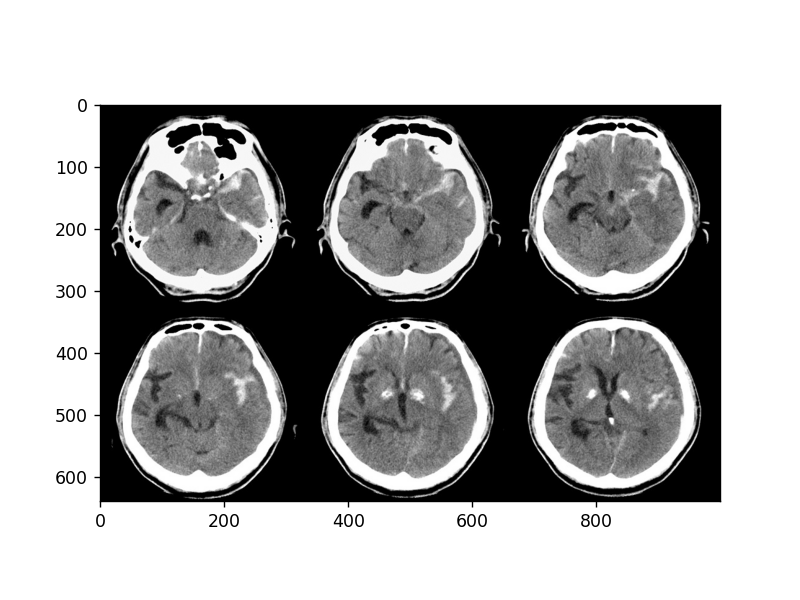

In [5]:
i=5
filename=ddir

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
#    coords=list()

    # print 'x = %d, y = %d'%(
    #     ix, iy)

    # assign global variable to access outside of function
    global coords
    coords.append((ix,iy))

    # Disconnect after 2 clicks
    if len(coords) == 6:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return coords

def circle_points(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
#    coords=list()

    # print 'x = %d, y = %d'%(
    #     ix, iy)

    # assign global variable to access outside of function
    global coords_cir
    coords_cir.append((ix,iy))

    # Disconnect after 2 clicks
    if len(coords_cir) == 3:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return coords_cir

def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)
coords = []
## Call click func
fig = plt.figure()
img = plt.imread(filename)
coords = []
plt.imshow(img)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

<IPython.core.display.Javascript object>


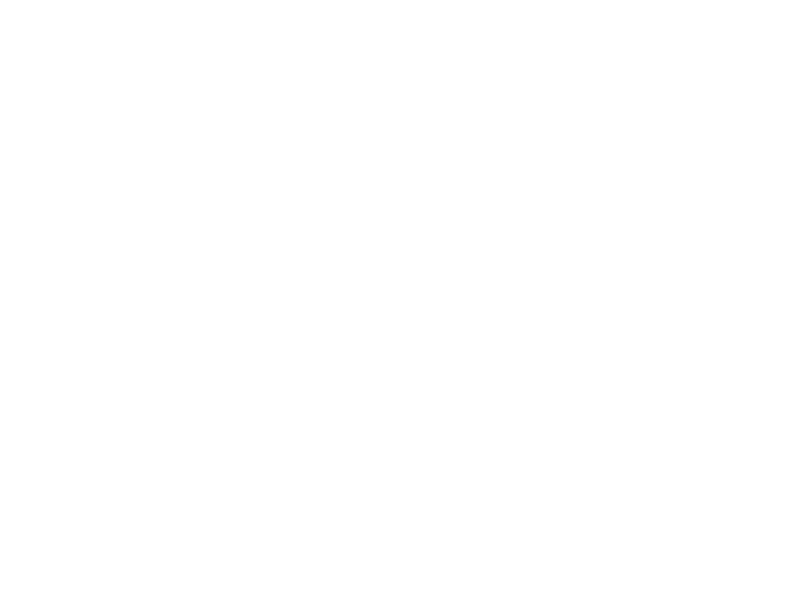

TypeError: coordinate list must contain at least 2 coordinates

In [15]:
i=5
filename=ddir

import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
#image = Image.new("RGB", (640, 480))
fig = plt.figure()
#img = plt.imread(ddir+'p'+str(i)+'.JPG')
img1 = Image.open(filename)
#plt.imshow(img)
draw = ImageDraw.Draw(img1)
#draw.polygon((coords), fill=200)
draw.polygon((coords),outline=(255, 0, 0))
#draw.line((coords), fill=200)
plt.imshow(img1)
x1,y1='%0.2f'%coords[0][0],'%0.2f'%coords[0][1]
x2,y2='%0.2f'%coords[1][0],'%0.2f'%coords[1][1]
x3,y3='%0.2f'%coords[2][0],'%0.2f'%coords[2][1]
x4,y4='%0.2f'%coords[3][0],'%0.2f'%coords[3][1]
x5,y5='%0.2f'%coords[4][0],'%0.2f'%coords[4][1]
x6,y6='%0.2f'%coords[5][0],'%0.2f'%coords[5][1]

#plt.text(coords[0][0],coords[0][1],str(x1)+','+str(y1),bbox=dict(facecolor='yellow', alpha=0.5))

#plt.text(coords[1][0],coords[1][1],str(x2)+','+str(y2),bbox=dict(facecolor='green', alpha=0.5))

#plt.text(coords[3][0],coords[3][1],str(x4)+','+str(y4),bbox=dict(facecolor='yellow', alpha=0.5))

#plt.text(coords[5][0],coords[5][1],str(x6)+','+str(y6),bbox=dict(facecolor='green', alpha=0.5))
plt.rcParams.update({'font.size': 10})

<IPython.core.display.Javascript object>


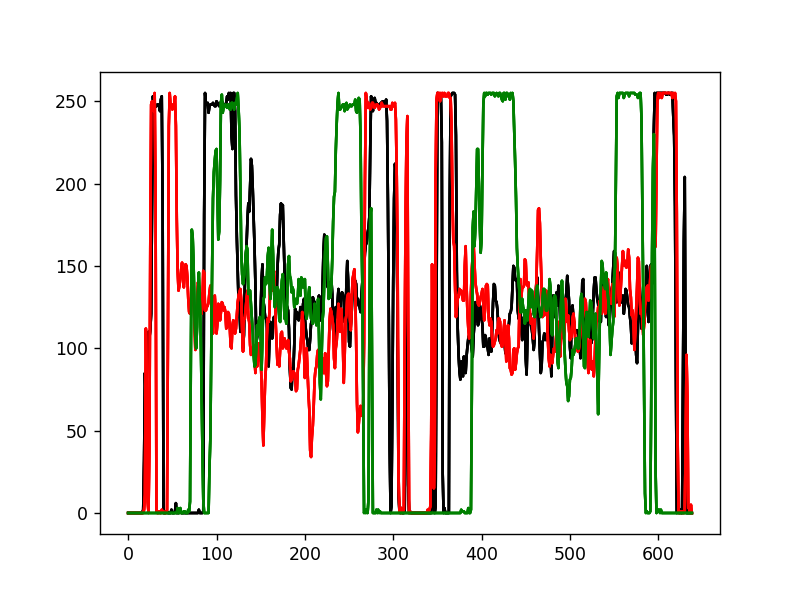

In [8]:
fig,ax=plt.subplots(1)
ax.plot(img[:,200],'-k')
ax.plot(img[:,500],'-r')
ax.plot(img[:,400],'-g')

In [9]:
np.shape(img)

(639, 1000, 3)

<IPython.core.display.Javascript object>


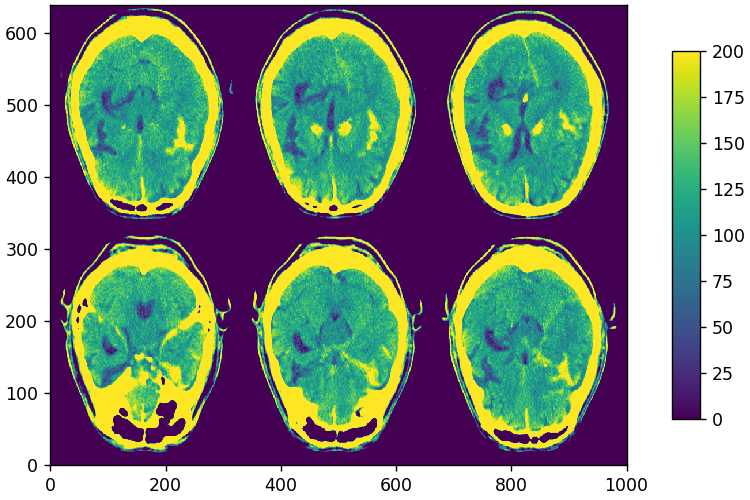

In [10]:
import matplotlib.colors as mcolors
arr = img[:, :,1] .reshape((639, 1000))
norm = mcolors.Normalize(vmin=0., vmax=200.)
pc_kwargs = {'rasterized': True, 'cmap': 'viridis', 'norm': norm}
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=ax, shrink=0.8)

<IPython.core.display.Javascript object>


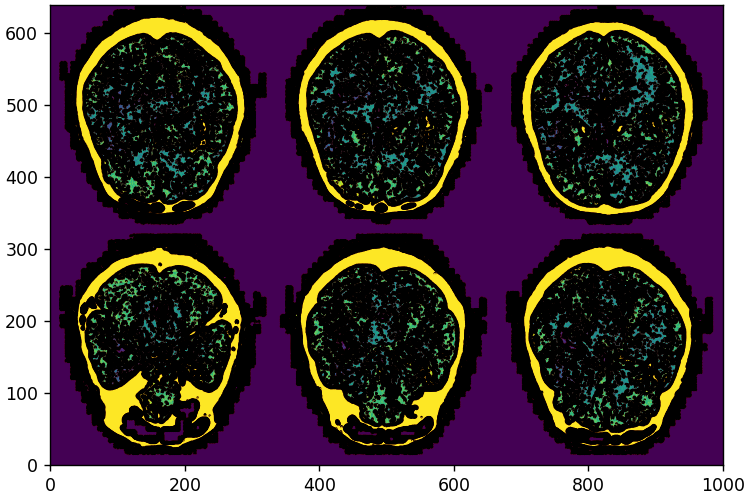

In [11]:
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
im = ax.pcolormesh(arr, **pc_kwargs)
ax.contour(arr, vmin=0., vmax=10., colors='red', alpha=0.5)
ax.contour(arr, colors='k')


<IPython.core.display.Javascript object>


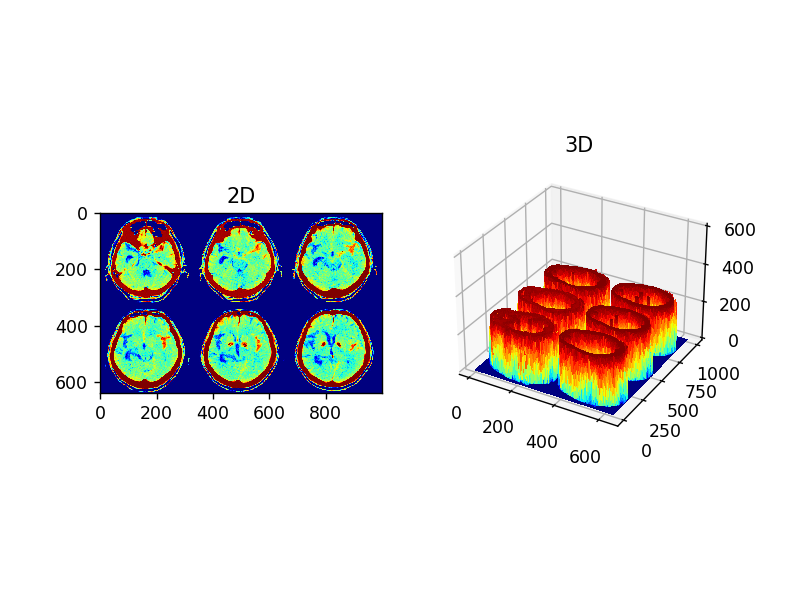

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as pl
from PIL import Image
import numpy as np
import pylab

#img = Image.open('40.jpg').convert('L')
z   = np.asarray(arr)
mydata = z[::1,::1]
fig = pl.figure(facecolor='w')
ax1 = fig.add_subplot(1,2,1)
im = ax1.imshow(mydata,interpolation='nearest',cmap=pl.cm.jet)
ax1.set_title('2D')

ax2 = fig.add_subplot(1,2,2,projection='3d')
x,y = np.mgrid[:mydata.shape[0],:mydata.shape[1]]
ax2.plot_surface(x,y,mydata,cmap=pl.cm.jet,rstride=1,cstride=1,linewidth=0.,antialiased=False)
ax2.set_title('3D')
ax2.set_zlim3d(0,600)
pl.show()